# Aim:
Apply Prewitt, Sobel, Laplacian, Canny operators on a test image and observe subjective performance.

In [ ]:
# IMPORT 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
test_image = cv2.imread("/content/pirate.tif", 0)

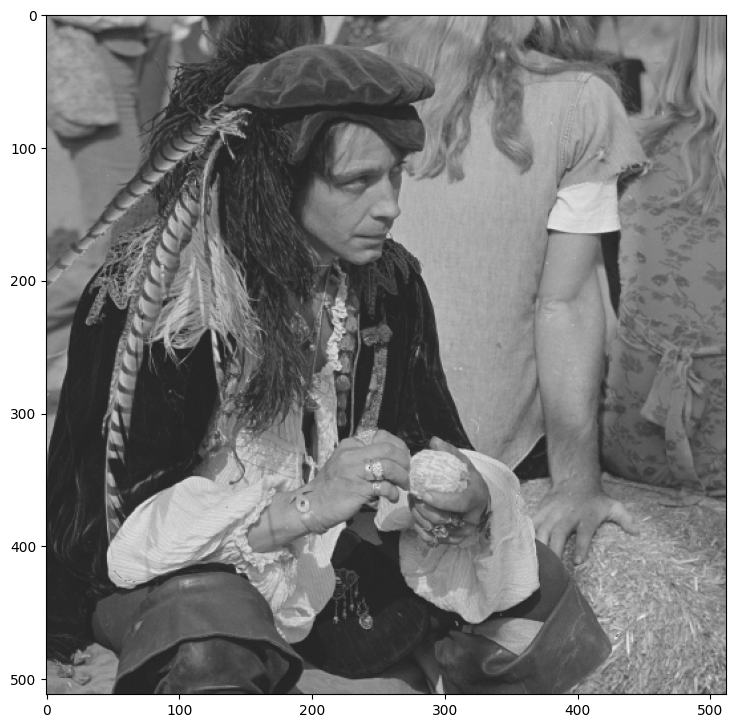

In [ ]:
plt.figure(figsize=(11, 9), dpi=100)
plt.imshow(test_image, cmap="gray",vmin = 0, vmax = 255)

# Prewitt 


In [ ]:
m_x = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
m_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
m_d = np.array([[0,1,1],[-1,0,1],[-1,-1,0]])

img_h = np.zeros(test_image.shape,)
img_v = np.zeros(test_image.shape,)
img_d = np.zeros(test_image.shape,)
img_all = np.zeros(test_image.shape,)

for i in range(1,test_image.shape[0]-1):
  for j in range(1,test_image.shape[1]-1):
    # Convolving our Prewitt mask over the image
    img_h[i,j]=np.sum(np.multiply(m_x, test_image[i-1:i+2,j-1:j+2]))
    img_v[i,j]=np.sum(np.multiply(m_y, test_image[i-1:i+2,j-1:j+2]))
    img_d[i,j]=np.sum(np.multiply(m_d, test_image[i-1:i+2,j-1:j+2]))

img_all = img_h+img_v+img_d


Plotting

Text(0.5, 1.0, 'All')

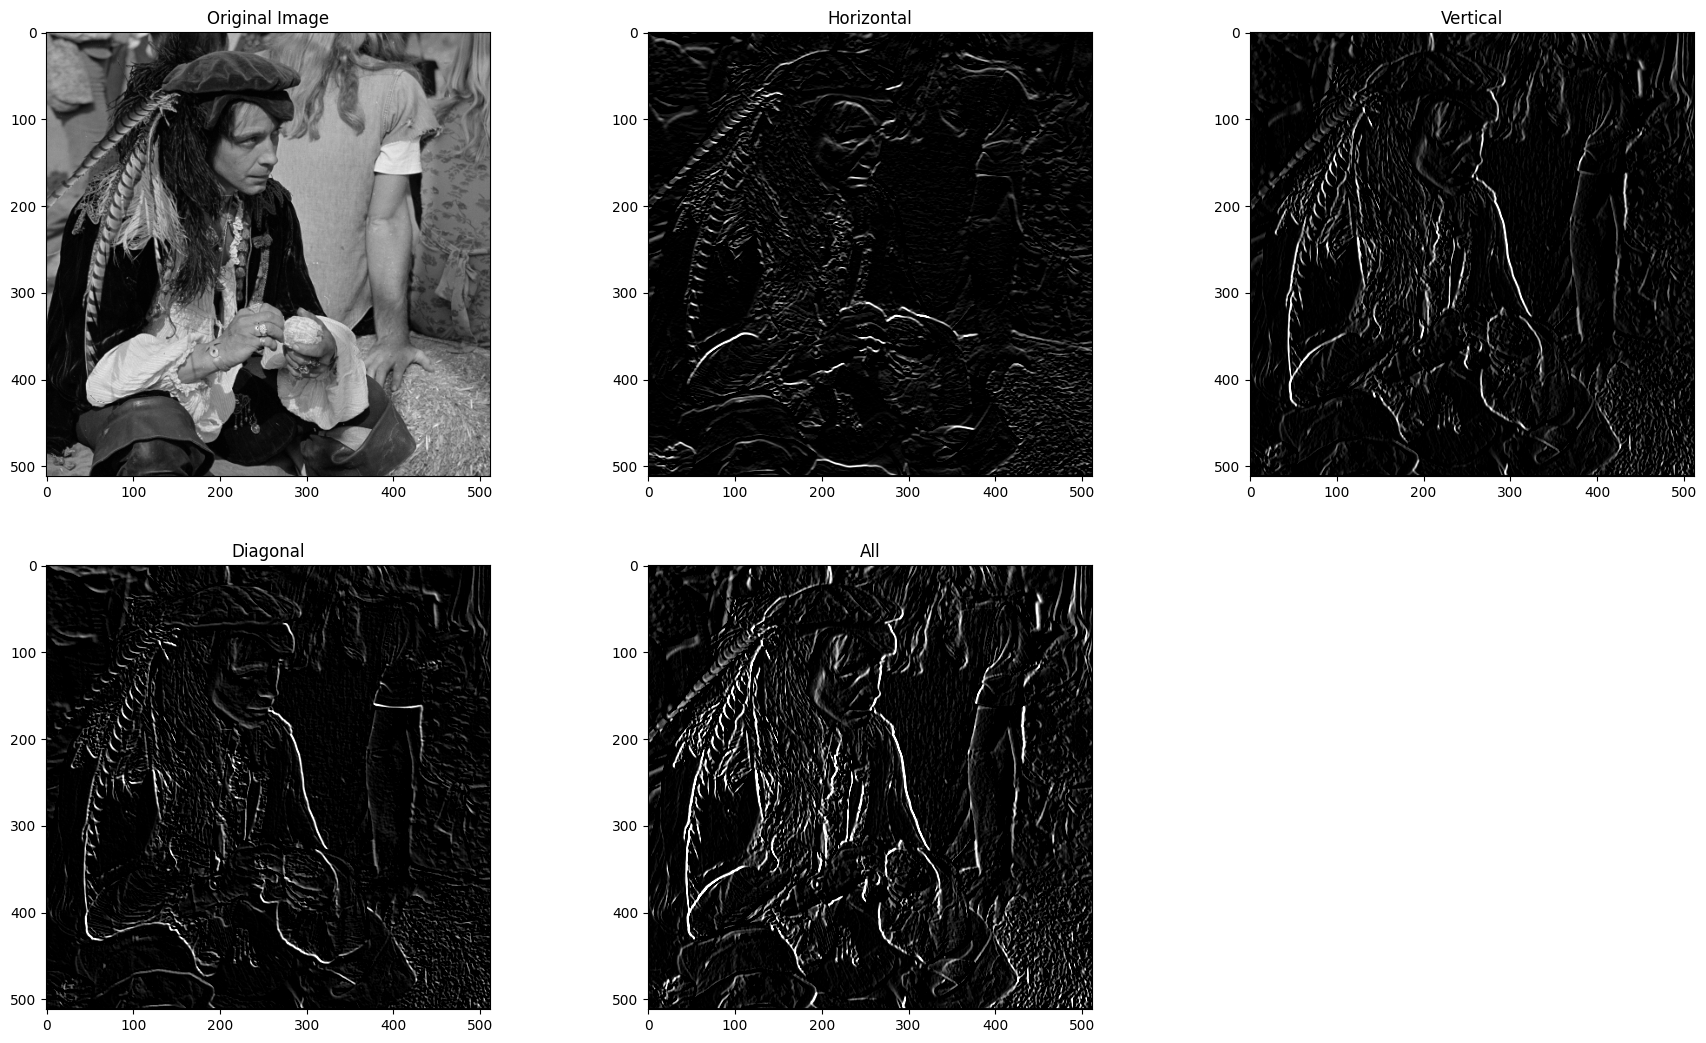

In [ ]:
plt.figure(figsize=(22,20),dpi=100)
plt.subplot(3,3,1)
plt.imshow(test_image,cmap="gray")
plt.title("Original Image")
plt.subplot(3,3,2)
plt.imshow(img_h,cmap="gray", vmin = 0, vmax = 255)
plt.title("Horizontal")
plt.subplot(3,3,3)
plt.imshow(img_v,cmap="gray", vmin = 0, vmax = 255)
plt.title("Vertical")
plt.subplot(3,3,4)
plt.imshow(img_d,cmap="gray", vmin = 0, vmax = 255)
plt.title("Diagonal")
plt.subplot(3,3,5)
plt.imshow(img_all,cmap="gray", vmin = 0, vmax = 255)
plt.title("All")

#Sobel 

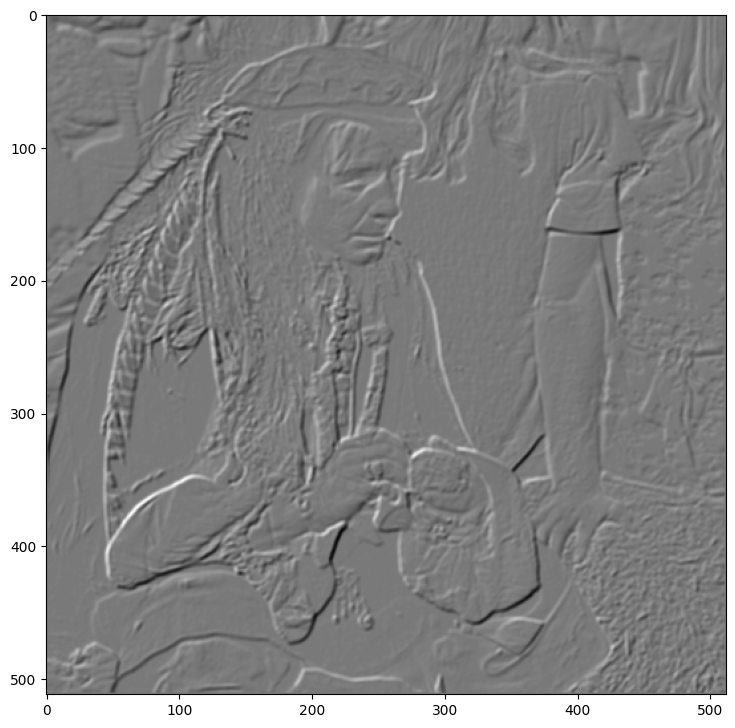

In [ ]:
def SOBEL_EDGE_DETECTION(test_image):
  test_image = cv2.blur(test_image,(3,3))
  horizontal_mask=np.matrix([[-1,-2,-1],[0,0,0],[1,2,1]])
  vertical_mask = np.matrix([[-1,0,1],[-2,0,2],[-1,0,1]])
  horizontal = np.zeros(test_image.shape,)
  vertical = np.zeros(test_image.shape,)

  for row in range(1, test_image.shape[0]-1):
      for col in range(1, test_image.shape[1]-1):
        # Convolving our sobel mask over the image
        horizontal[row,col]=np.sum(np.multiply(horizontal_mask,test_image[row-1:row+1+1,col-1:col+1+1]))
        vertical[row,col]=np.sum(np.multiply(vertical_mask,test_image[row-1:row+1+1,col-1:col+1+1]))
  sobel=horizontal+vertical
  return sobel
plt.figure(figsize=(11, 9), dpi=100)
plt.imshow(SOBEL_EDGE_DETECTION(test_image), cmap="gray")



# LAPLACE

In [ ]:
def LAPLACE_EDGE_DETECTION(test_image):
  laplace_kernel=np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

  laplace_edge = np.zeros(test_image.shape,)

  for row in range(1, test_image.shape[0]-1):
      for col in range(1, test_image.shape[1]-1):
        laplace_edge[row,col]=np.sum(np.multiply(laplace_kernel,test_image[row-1:row+1+1,col-1:col+1+1]))
  
  return laplace_edge

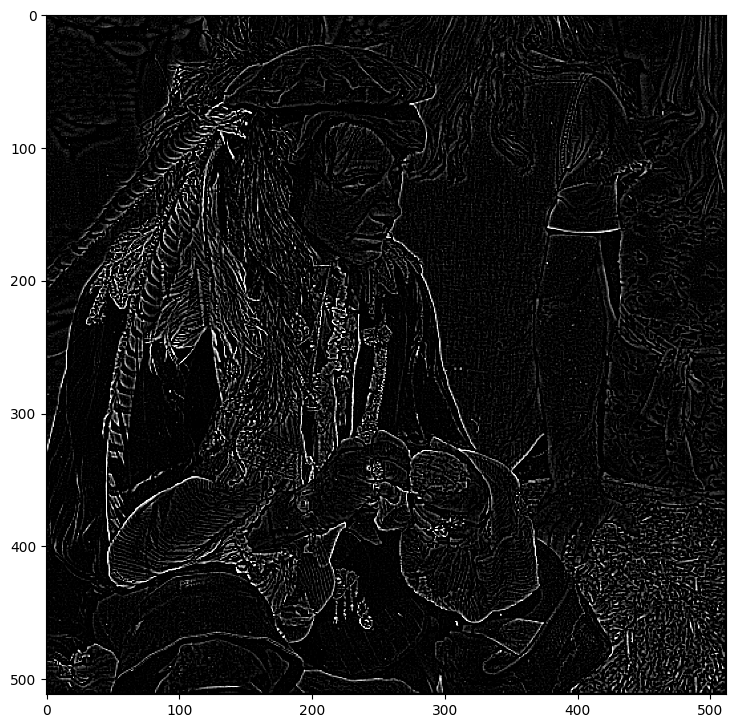

In [ ]:
plt.figure(figsize=(11, 9), dpi=100)
plt.imshow(LAPLACE_EDGE_DETECTION(test_image), cmap="gray", vmin=0, vmax=255)

# CANNY Edge Detection

## The Canny edge detection algorithm is composed of 5 steps:

### 1. Noise reduction;
### 2. Gradient calculation;
### 3. Non-maximum suppression;
### 4. Double threshold;
### 5. Edge Tracking by Hysteresis.


<font size="4">Edges correspond to a change of pixels’ intensity. To detect it, the easiest way is to apply filters that highlight this intensity change in both directions: horizontal (x) and vertical (y)
When the image is smoothed, the derivatives Ix and Iy w.r.t. x and y are calculated. It can be implemented by convolving I with Sobel kernels Kx and Ky, respectively:

## **STEP 1: SOBEL EDGE DETECTION**

In [ ]:
# test_image = cv2.blur(test_image,(5,5))
horizontal_mask=np.matrix([[-1,-2,-1],[0,0,0],[1,2,1]])
vertical_mask = np.matrix([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal = np.zeros(test_image.shape,)
vertical = np.zeros(test_image.shape,)

for row in range(1, test_image.shape[0]-1):
    for col in range(1, test_image.shape[1]-1):
      # Convolving our sobel mask over the image
      horizontal[row,col]=np.sum(np.multiply(horizontal_mask,test_image[row-1:row+1+1,col-1:col+1+1]))
      vertical[row,col]=np.sum(np.multiply(vertical_mask,test_image[row-1:row+1+1,col-1:col+1+1]))
sobel=horizontal+vertical

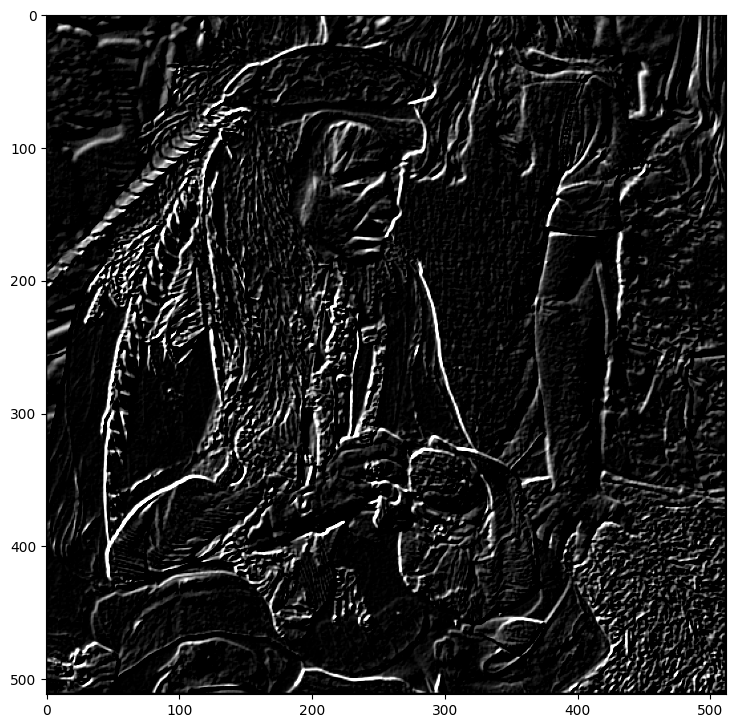

In [ ]:
plt.figure(figsize=(11, 9), dpi=100)
plt.imshow(sobel, cmap="gray",vmin = 0, vmax = 255)

In [ ]:
magnitude = np.hypot(horizontal,vertical,)
magnitude = magnitude/magnitude.max()*255

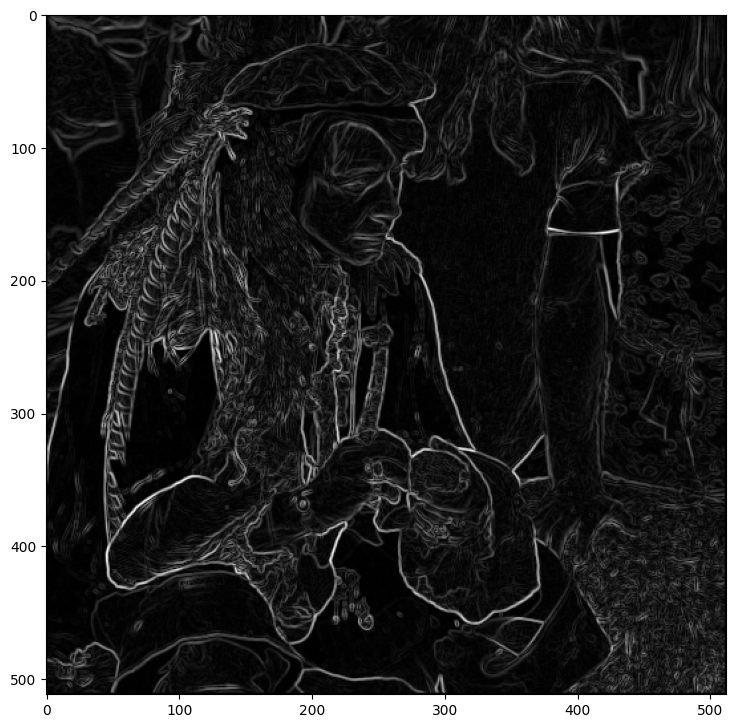

In [ ]:
plt.figure(figsize=(11, 9), dpi=100)
plt.imshow(magnitude, cmap="gray",vmin = 0, vmax = 255)

In [ ]:
argument=np.arctan2(vertical,horizontal,)

In [ ]:
print(argument*(180/np.pi))

[[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.         -146.76828893 -178.4518423  ...   54.46232221
  -106.92751306    0.        ]
 [   0.          -83.65980825 -122.31961651 ...  180.
   -99.78240703    0.        ]
 ...
 [   0.          168.69006753   78.69006753 ... -116.14684124
  -174.61068824    0.        ]
 [   0.           21.80140949   71.56505118 ... -131.15396991
  -159.52772048    0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]


## **STEP 2: NON MAXIMAL SUPPRESSION**

<font size="5">Ideally, the final image should have thin edges. Thus, we must perform non-maximum suppression to thin out the edges.
The principle is simple: the algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions.</font>

\\
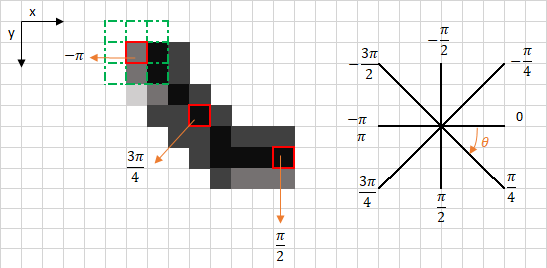

<font size="5">Let’s sum this up. Each pixel has 2 main criteria edge direction in radians, and pixel intensity (between 0–255). Based on these inputs the non-max-suppression steps are:
<ul><font size="5">
<li>Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;
<li>Identify the edge direction based on the angle value from the angle matrix;
<li>Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;
<li>Return the image processed with the non-max suppression algorithm.</ul></font>

In [ ]:
def nonmax_suppression(det, phase):
  # Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;
  gmax = np.zeros(det.shape,)
  for i in range(1,gmax.shape[0]-1):
      for j in range(0,gmax.shape[1]-1):
          if phase[i][j] < 0:
              phase[i][j] += 360
            # Identify the edge direction based on the angle value from the angle matrix;
            # Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;
          if ((j + 1) < gmax.shape[1]) and ((j - 1) >= 0) and ((i + 1) < gmax.shape[0]) and ((i - 1) >= 0):
              # 0 degrees
              if (phase[i][j] >= 337.5 or phase[i][j] < 22.5) or (phase[i][j] >= 157.5 and phase[i][j] < 202.5):
                  if det[i][j] >= det[i][j + 1] and det[i][j] >= det[i][j - 1]:
                      gmax[i][j] = det[i][j]
              # 45 degrees
              if (phase[i][j] >= 22.5 and phase[i][j] < 67.5) or (phase[i][j] >= 202.5 and phase[i][j] < 247.5):
                  if det[i][j] >= det[i - 1][j + 1] and det[i][j] >= det[i + 1][j - 1]:
                      gmax[i][j] = det[i][j]
              # 90 degrees
              if (phase[i][j] >= 67.5 and phase[i][j] < 112.5) or (phase[i][j] >= 247.5 and phase[i][j] < 292.5):
                  if det[i][j] >= det[i - 1][j] and det[i][j] >= det[i + 1][j]:
                      gmax[i][j] = det[i][j]
              # 135 degrees
              if (phase[i][j] >= 112.5 and phase[i][j] < 157.5) or (phase[i][j] >= 292.5 and phase[i][j] < 337.5):
                  if det[i][j] >= det[i - 1][j - 1] and det[i][j] >= det[i + 1][j + 1]:
                      gmax[i][j] = det[i][j]
  # Return the image processed with the non-max suppression algorithm
  return gmax

non_maximum_image=nonmax_suppression(magnitude,argument)

Text(0.5, 1.0, 'Image after Non Maximal Supression')

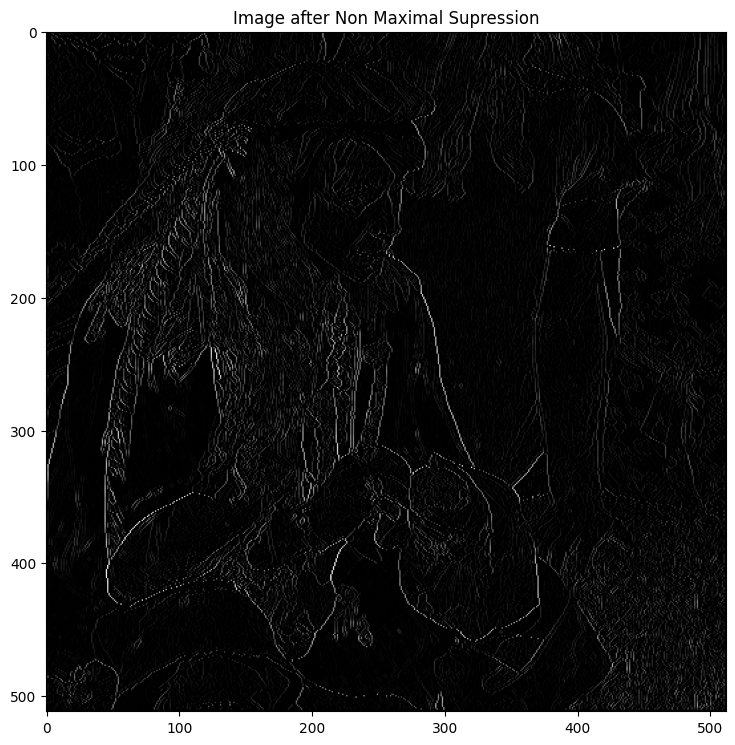

In [ ]:
plt.figure(figsize=(11, 9), dpi=100)
plt.imshow(non_maximum_image, cmap="gray",vmin = 0, vmax = 255)
plt.title('Image after Non Maximal Supression')

In [ ]:
non_maximum_image

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         8.44580062,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        10.3379839 ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  3.58256085, ...,  0.        ,
        37.40303331,  0.        ],
       [ 0.        ,  3.78360595,  0.        , ..., 59.25405016,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## **STEP 3: DOUBLE THRESHOLDING**

<font size=5>The double threshold step aims at identifying 3 kinds of pixels: strong, weak, and non-relevant:
<ul><font size=5><li>Strong pixels are pixels that have an intensity so high that we are sure they contribute to the final edge.
<li>Weak pixels are pixels that have an intensity value that is not enough to be considered as strong ones, but yet not small enough to be considered as non-relevant for the edge detection.
<li>Other pixels are considered as non-relevant for the edge.</ul></font>

In [ ]:
highThreshold = 40
lowThreshold = 30
print(highThreshold,lowThreshold)
double_thresholding = np.zeros(non_maximum_image.shape, dtype=np.int32)

weak = np.int32(25)
strong = np.int32(255)

strong_i, strong_j = np.where(non_maximum_image >= highThreshold)
zeros_i, zeros_j = np.where(non_maximum_image < lowThreshold)
weak_i, weak_j = np.where((non_maximum_image <= highThreshold) & (non_maximum_image >= lowThreshold))

double_thresholding[strong_i, strong_j] = strong
double_thresholding[weak_i, weak_j] = weak

40 30


Text(0.5, 1.0, 'Image after Double Thresholding')

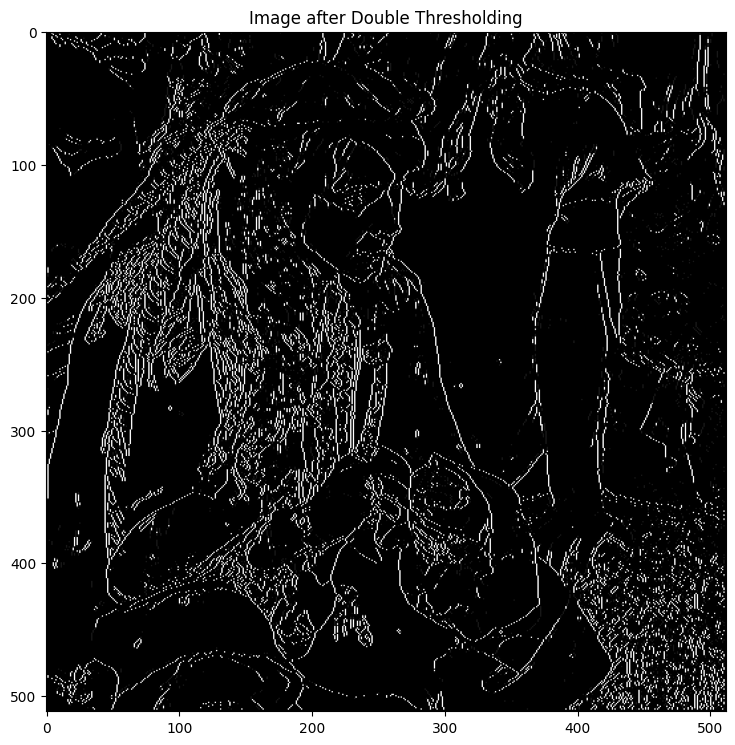

In [ ]:
plt.figure(figsize=(11, 9), dpi=100)
plt.imshow(double_thresholding, cmap="gray",vmin = 0, vmax = 255)
plt.title('Image after Double Thresholding')

## **STEP 4: EDGE TRACKING USING HYSTERESIS**

<font size = 5 >Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one, as described below:
</font>

\
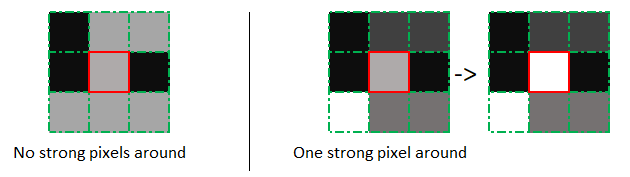

In [ ]:
hysteresis = double_thresholding.copy()
mask_identity= np.ones((3,3),dtype=np.uint8)
for i in range(1, hysteresis.shape[0]-1):
        for j in range(1, hysteresis.shape[1]-1):
            if (double_thresholding[i,j] == weak):
               
                    if (np.min((np.multiply(mask_identity,double_thresholding[i-1:i+1+1,j-1:j+1+1])))==strong):
                        hysteresis[i, j] = strong
                    else:
                        hysteresis[i, j] = 0
               

Text(0.5, 1.0, 'FINAL CANNY EDGE DETECTION')

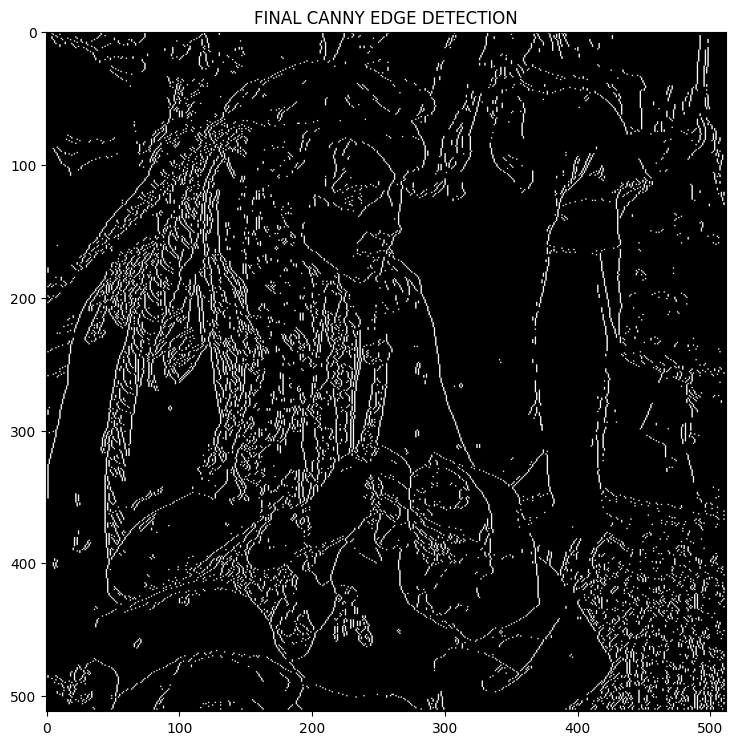

In [ ]:
plt.figure(figsize=(11, 9), dpi=100)
plt.imshow(hysteresis, cmap="gray",vmin = 0, vmax = 255)
plt.title("FINAL CANNY EDGE DETECTION")

# FINAL COMPARISON

Text(0.5, 1.0, 'FINAL CANNY EDGE DETECTION')

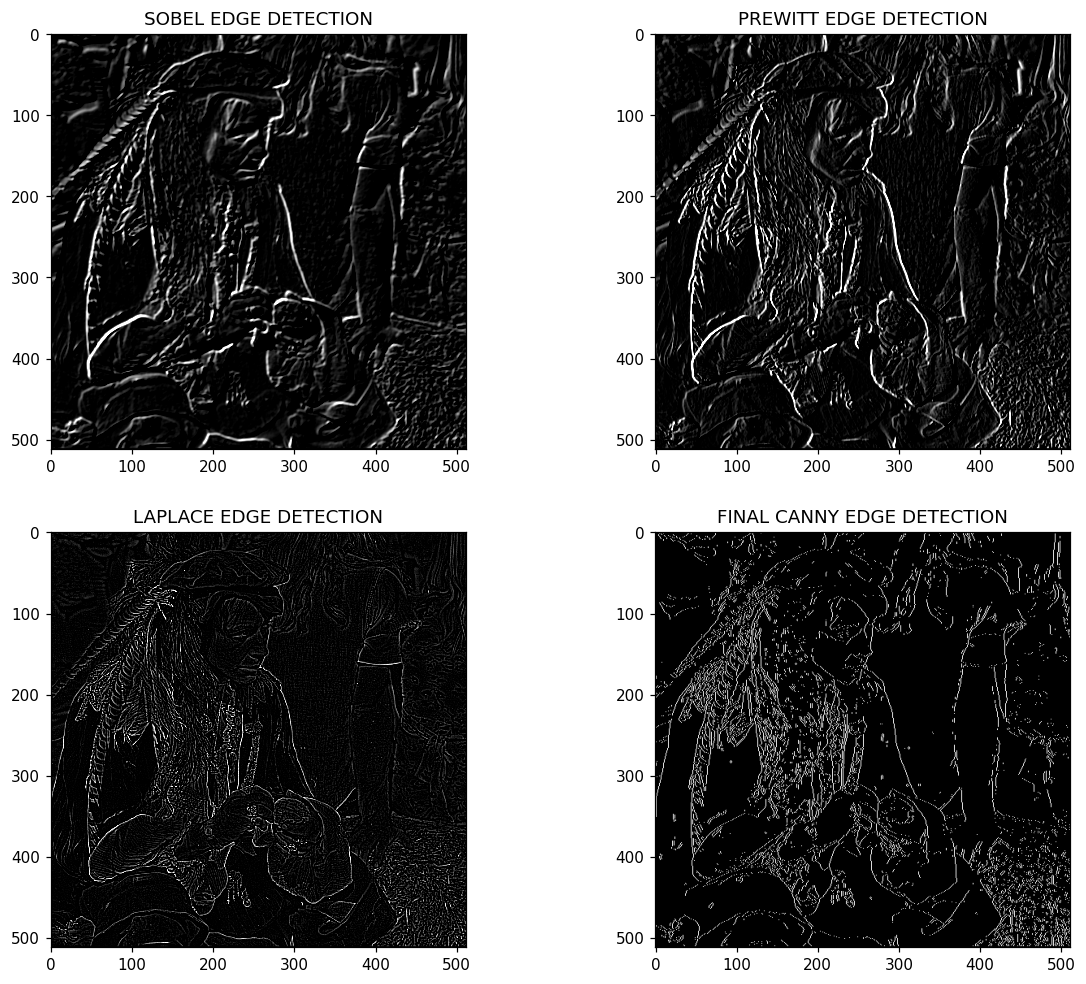

In [ ]:
plt.figure(figsize=(13, 11), dpi=110)
plt.subplot(2,2,1)
plt.imshow(SOBEL_EDGE_DETECTION(test_image), cmap="gray",vmin = 0, vmax = 255)
plt.title("SOBEL EDGE DETECTION")
plt.subplot(2,2,2)
plt.imshow(img_all,cmap="gray",vmin = 0, vmax = 255)
plt.title("PREWITT EDGE DETECTION")
plt.subplot(2,2,3)
plt.imshow(LAPLACE_EDGE_DETECTION(test_image), cmap="gray",vmin = 0, vmax = 255)
plt.title("LAPLACE EDGE DETECTION")
plt.subplot(2,2,4)
plt.imshow(hysteresis, cmap="gray",vmin = 0, vmax = 255)
plt.title("FINAL CANNY EDGE DETECTION")

# In the four operators that we have used we see that prewitt is the most basic and does not highlight the edges as well as the others
# Sobel removes the noise but is still ineffective
# Laplacian uses second derivative and is hence more accurate though being more sensitive to noise
# The best one is canny. It is a lengthy process but produces smoother edges due to implementation of non maxima suppression and hysteresis